In [35]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
yt = pd.read_csv('/Users/muhammadramzy/Downloads/USvideos.csv')

In [12]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [13]:
yt.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [14]:
yt.describe()['likes']['75%']

55417.0

## Latihan distribution plot dengan seaborn

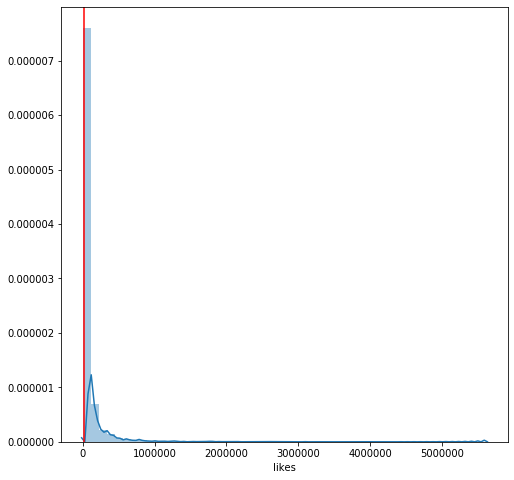

In [15]:
plt.figure(figsize=(8,8))
sns.distplot(yt['likes'])
plt.axvline(np.median(yt['likes']), color='red')

In [16]:
batas_atas = yt.describe()['likes']['75%'] + (1.5 * yt.describe()['likes']['75%']-yt.describe()['likes']['25%'])
batas_bawah = yt.describe()['likes']['25%'] - (1.5 * yt.describe()['likes']['75%']-yt.describe()['likes']['25%'])

In [17]:
batas_bawah

-72277.5

In [18]:
IQR = yt[(yt['likes'] > batas_bawah) & (yt['likes']<batas_atas)][['likes']]
IQR

,likes
0,57527
1,97185
3,10172
4,132235
5,9763
...,...
40940,46351
40941,45128
40944,38160
40945,60008


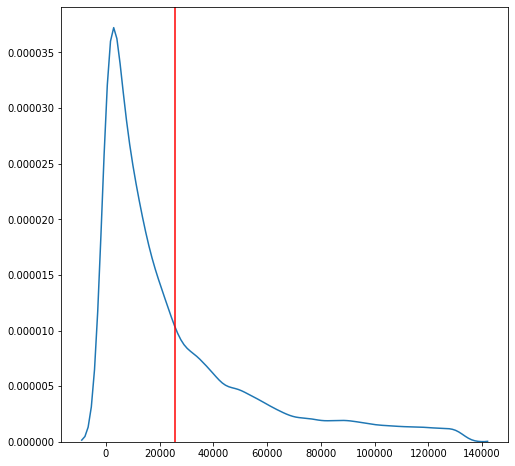

In [19]:
plt.figure(figsize=(8,8))
sns.distplot(IQR, hist=False)
plt.axvline(np.mean(IQR['likes']), color='red')

In [20]:
std3 = 3*yt.describe()['likes']['std']

In [21]:
data2 = yt[yt['likes']<std3][['likes']]
np.mean(data2)

likes    52110.058534
dtype: float64

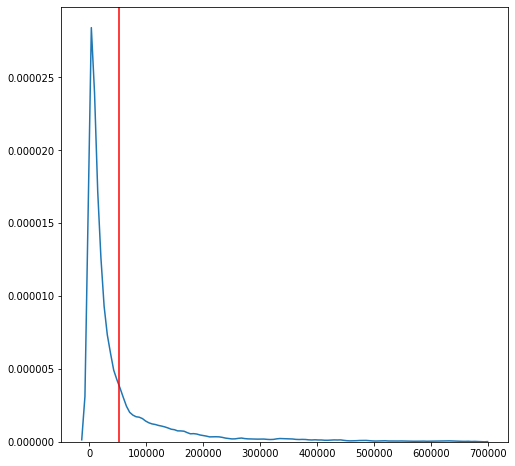

In [22]:
plt.figure(figsize=(8,8))
sns.distplot(data2, hist=False)
plt.axvline(np.mean(data2['likes']), color='red')

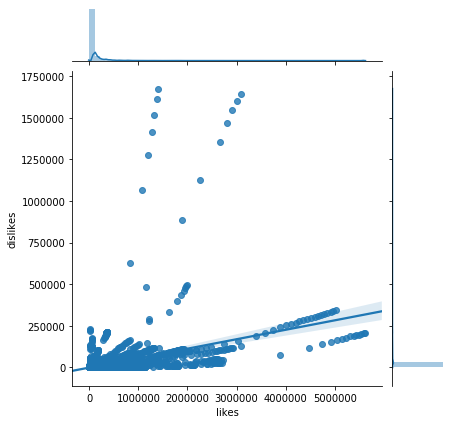

In [23]:
sns.jointplot(x=yt['likes'],y=yt['dislikes'],kind='reg')

In [24]:
yt[['likes', 'dislikes']].corr('spearman')

,likes,dislikes
likes,1.000000,0.798874
dislikes,0.798874,1.000000


In [25]:
yt[['likes', 'dislikes']].corr('pearson')

,likes,dislikes
likes,1.000000,0.447186
dislikes,0.447186,1.000000


In [26]:
yt[['likes', 'dislikes']].corr('kendall')

,likes,dislikes
likes,1.000000,0.614065
dislikes,0.614065,1.000000


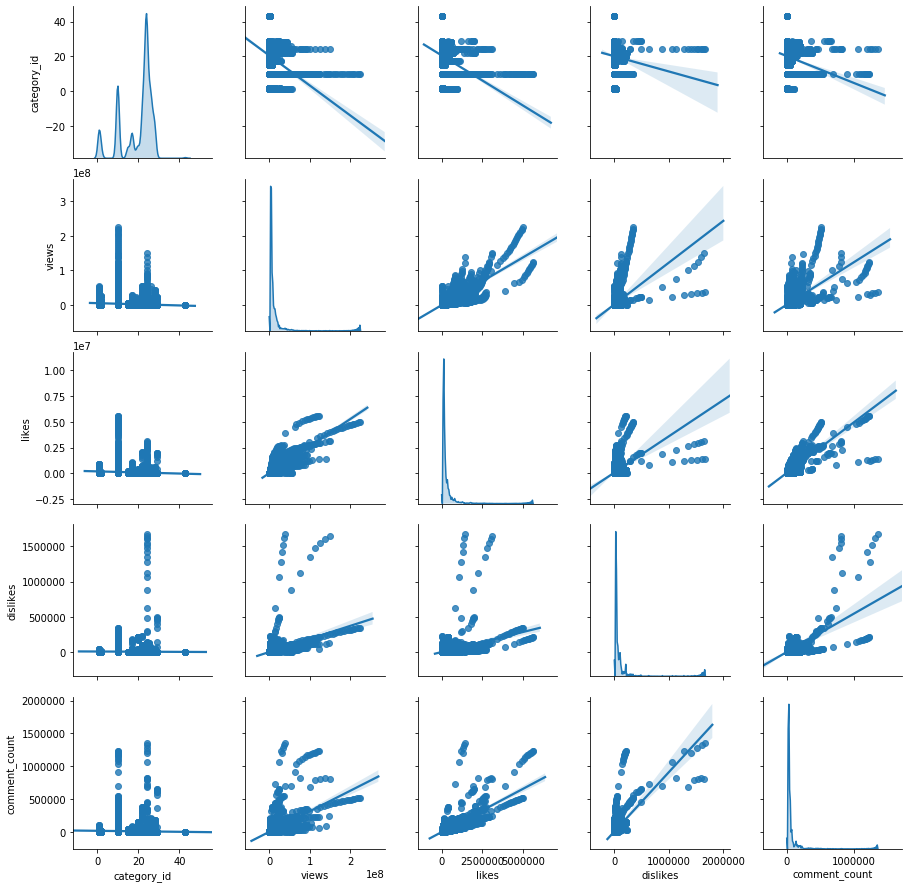

In [27]:
sns.pairplot(yt.drop(['comments_disabled', 'ratings_disabled', 'video_error_or_removed'], axis=1),
             palette='colorblind',kind='reg', diag_kind='kde')

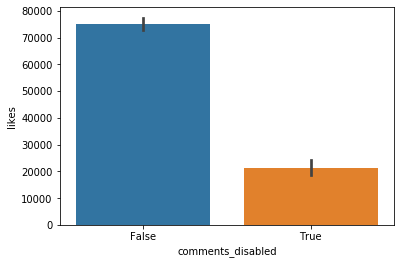

In [28]:
sns.barplot(x='comments_disabled', y='likes', data = yt)

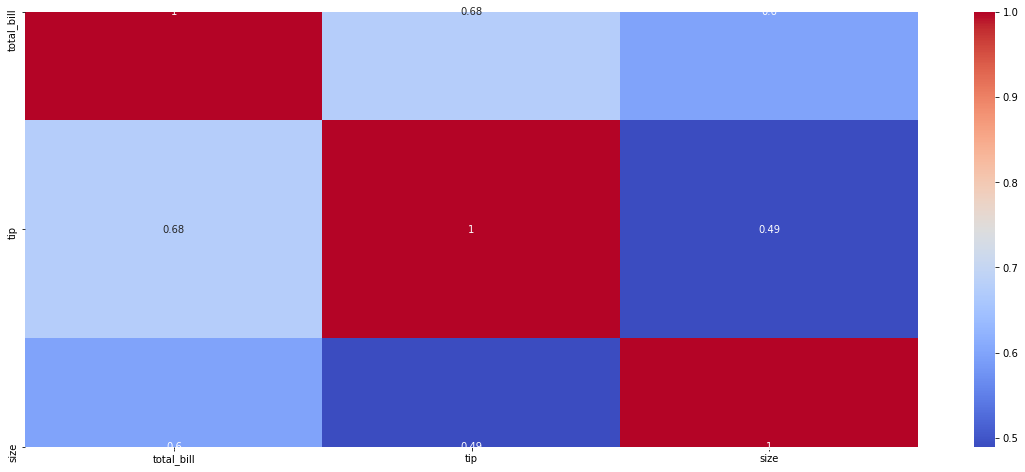

In [55]:
plt.figure(figsize=(20
                    ,8)
          )
sns.heatmap(tips.corr(), cmap='coolwarm', annot = True)

In [30]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [38]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [39]:
pvflight = flights.pivot_table(values = 'passengers', index='month',columns=
                              'year')
pvflight

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


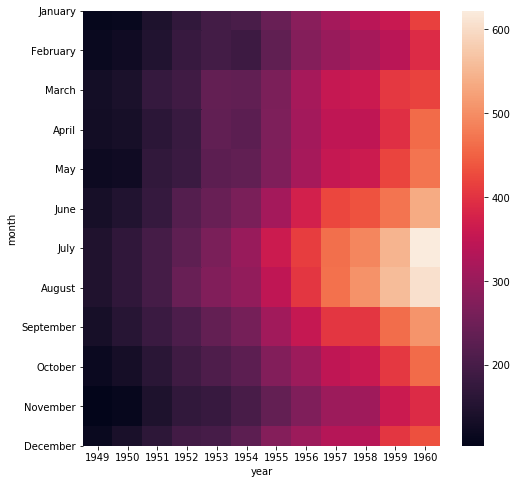

In [61]:
plt.figure(figsize=(8,8))
sns.heatmap(pvflight)

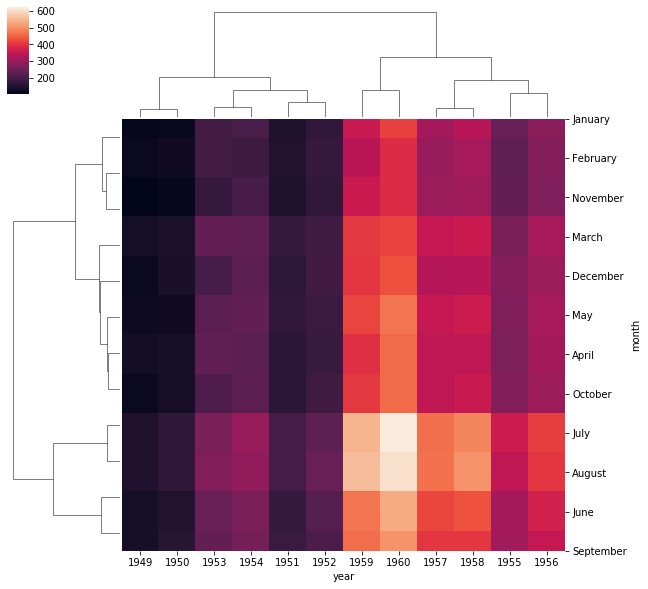

In [42]:
sns.clustermap(pvflight)

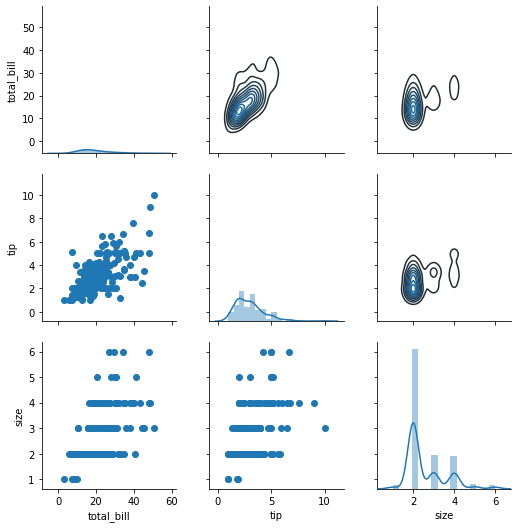

In [49]:
g = sns.PairGrid(tips)
g.map_diag(sns.distplot)
g.map_upper(sns.kdeplot)
g.map_lower(plt.scatter)

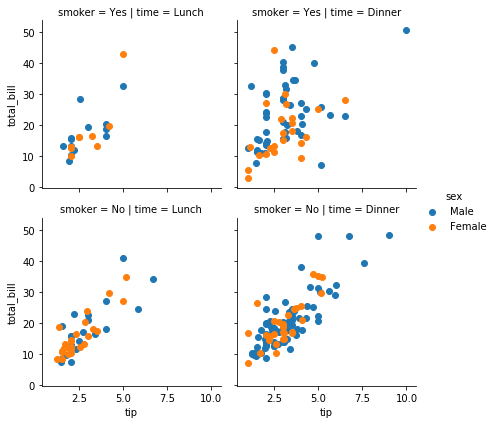

In [50]:
b = sns.FacetGrid(data=tips,col='time',row='smoker',hue='sex')
b.map(plt.scatter,'tip','total_bill').add_legend()

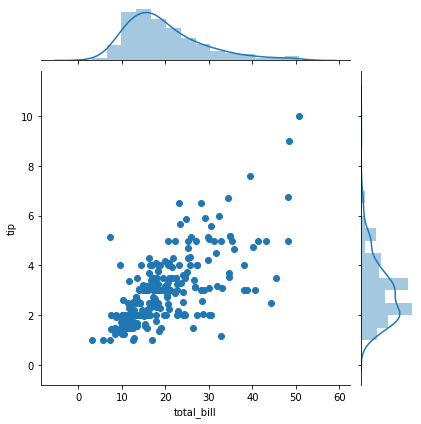

In [60]:
a=sns.JointGrid(x='total_bill',y='tip',data=tips)
a.plot(plt.scatter,sns.distplot)